# A Subtle Issue with Expected Limits Made with Aysmptotics for More Than One Parameter

by Kyle Cranmer & Johann Brehmer, March 2018

This short notebook addresses an easy-to-make mistake in setting expected limits using asymptotics in models with more than one parameter of interest. Let $\theta$ be the parameter vector, $k$ be the dimensionality of the parameter vector, $x$ be the data, $p(x|\theta)$ be the statistical model, and $\hat{\theta}=\hat{\theta}(x)$ be the maximum likelihood estimator (MLE). 

In the asymptotic approximation 
\begin{equation}
q_\theta = -2\log\lambda(\theta) \approx (\hat{\theta} - \theta)^T V^{-1} (\hat{\theta} - \theta)
\end{equation}
where $V$ is the covariance matrix for the MLE, which can be related to the Fisher information matrix $V^{-1}_{ij} = - E\left [\frac{\partial^2}{\partial \theta_i \partial \theta_j} \log L(\theta)\right ]$.

One then considers the distribution of $q_\theta$ assuming the true value $\theta_0$. The null hypothesis is $\theta_0=\theta$ and the distribution $p(q_\theta|\theta)$ is a chisquare distribution with $k$ degrees of freedom, where $k$ is the dimensionality of $\theta$. The expected p-values for expected limits involve assuming the true value is $\theta_0 \ne \theta$. The distribution for $p(q_\theta | \theta_0)$ is given by a non-central chisquare distribution with $N$ degrees of freedom and non-centrality parameter $\Lambda$. In the asymptotic limit
\begin{equation}
\Lambda = (\theta_0 - \theta)^T V^{-1} (\theta_0 - \theta)
\end{equation}
Alternatively $\Lambda = -2 \log \lambda_{\rm Asimov}(\theta) = q_A$ where the Asimov data is generated at $\theta_0$.

The issue is that while observed limits come from a simple contour of $-2 \log \lambda_{\rm obs.}(\theta)$, the median "expected" limit does not come from thresholding on $-2 \log \lambda_{\rm Asimov}(\theta)=q_A(\theta)$ at the same contour levels. The reason is that in more than one dimension the 
\begin{equation}
\text{median} \left[ -2 \log \lambda \right] \ne -2 \log \lambda_{Asimov}
\end{equation}
Instead 
\begin{equation}
\text{median} \left[ -2 \log \lambda \right] = F^{-1}( 1/2, k, \Lambda = -2 \log \lambda_{Asimov}),
\end{equation}
where $F$ is the cumulative distribution function of the noncentral chisquare (with $k$ degrees of freedom and noncentrality parameter $\Lambda$). Intuitively, $-2 \log \lambda_{Asimov}(\theta)$ only probes the variation of the MLE in the direction parallel to $(\theta-\theta_0)$, but fluctuations in the perpindicular directions need to be accounted for (which is irrelevant in one dimensional problems). 

The general equations relating the median to the Asimov value are discussed in the original paper and in these [slides from Ofer ](https://indico.cern.ch/event/74940/contributions/2088584/attachments/1047729/1493442/Wald-Asimov.pdf ), but the equations were only fleshed out in 1-D. The plot on page 5, for instance, is for $k=1$. It is likely that this subtle issue is often neglected.

Below we will plot what happens for $k=2$ and a simple model 
\begin{equation}
p(x,y | \theta) = N(x|\mu_x,1) N(y|\mu_y,1)
\end{equation}
and $\theta=(\mu_x, \mu_y)$. In this setting the asymptotic approximation is exact and $\hat{\theta} = (x,y)$.

### Conclusions:
   * The observed contours are not affected.
   * The "expected" 95% contours based on thresholding directly on $-2 \log \lambda_{Asimov}(\theta)$ are about 10% too wide
     * They can be interpreted as median expected limits for a 97% confidence level assuming $\theta_0$ is true.
     * They can be interpreted as a median+8% band for the 95% confidence interval assuming $\theta_0$ is true.
   * The "expected" 68% contours based on thresholding directly on $-2 \log \lambda_{Asimov}(\theta)$ are about 33% too wide
     * They can be interpreted as median expected limits for a 81% confidence level assuming $\theta_0$ is true.
     * They can be interpreted as a median+14% band for the 68% confidence interval assuming $\theta_0$ is true.   

In [1]:
import numpy as np
from scipy.stats import chi2, ncx2 #central and noncentral chi-square
import matplotlib.pyplot as plt
#plt.figure(dpi=300,figsize=(5,5))

### Plot median vs. $q_A$

Note, the median is approximately equal to $q_A+k-1=q_A+1$.

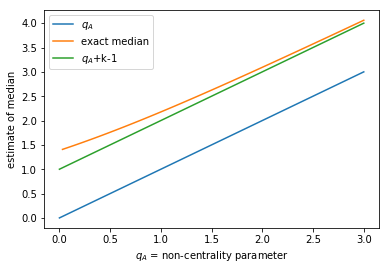

In [2]:
temp_q = np.linspace(0,3,100)
plt.plot(temp_q, temp_q, label='$q_A$')
plt.plot(temp_q, ncx2.median(df=2, nc=temp_q), label='exact median')
plt.plot(temp_q, temp_q+2-1, label='$q_A$+k-1')
plt.xlabel('$q_A$ = non-centrality parameter')
plt.ylabel('estimate of median')
plt.legend()

## What goes wrong if you use $q_A$ for expected limit

Probably many people are setting expected limits by using the $\chi^2_2$ tables for the Asimov data. Eg. looking for when $P( \chi^2_2 > q_A) = 5\%$.  

Let's consider the "standard model" point to be $\theta_0 = (\mu_x',\mu_y')=(0,0)$.

If we are testing the point $\theta = (\mu_x,\mu_y)=(2.447,0)$, then we have $P( \chi^2_2 > q_A) = 5\%$. Now run many "standard model" toys and look at the distribution of $p(q=-2\log \lambda(\theta) |\theta_0)$

In [3]:
N=100000 # Number of Monte Carlo toys
k=2 # dimensionality of parameter vector
CL=0.95 # target Confidence Level (eg. can switch to 68%)

In [4]:
mux_prime = 0.
muy_prime = 0.
mux = np.sqrt(chi2.ppf(CL,k)) # 2.447 = sqrt(5.99) is 95% threshold on chi^2 for k=2
muy = 0.
x=np.random.normal(mux_prime,1,N)
y=np.random.normal(muy_prime,1,N)

q_prime=(x-mux_prime)**2+(y-muy_prime)**2
q=(x-mux)**2+(y-muy)**2
q_A=(mux_prime-mux)**2+(muy_prime-muy)**2

note `q_A` is not equal to the mean or median, but `q_A+1` is very close to the median.

In [5]:
q_A, np.mean(q), np.median(q), q_A+2-1

(5.9914645471079799,
 7.9713428749304285,
 6.9867657750121488,
 6.9914645471079799)

Check the mean and median of a noncentral chisquare$_2$ with non centrality parameter `nc=q_A`. They are in good agreement with the toys

In [6]:
q_A, ncx2.mean(df=k, nc=q_A), ncx2.median(df=k, nc=q_A)

(5.9914645471079799, 7.9914645471079799, 7.0199654759560293)

**The Point** The p-value associated to $q_A$ is 5%, but it is not the p-value associated to the median of the standard model toys. The p-value for the median standard model toy is 3%

In [7]:
# p-values for alternative hypothesis using toys 
alt_p_q_A_toys = np.sum(q>q_A)/N
alt_p_median_toys = np.sum(q>q_A+k-1)/N
alt_p_q_A_toys, alt_p_median_toys

(0.58172999999999997, 0.49957000000000001)

In [8]:
# p-values for alternative hypothesis using exact results 
alt_p_q_A = 1.-ncx2.cdf(q_A, df=2,nc=q_A)
alt_p_median_toys = 1.-ncx2.cdf(q_A+k-1,df=2,nc=q_A)
alt_p_q_A, alt_p_median

NameError: name 'alt_p_median' is not defined

In [ ]:
# p-values for null hypothesis using toys
null_p_q_A_toys = np.sum(q_prime>q_A)/N
null_p_median_toys = np.sum(q_prime>q_A+1)/N
null_p_q_A_toys, null_p_median_toys

In [ ]:
# p-values for null hypothesis using exact results
null_p_q_A = 1.-chi2.cdf(q_A,k)
null_p_median = 1.-chi2.cdf(q_A+k-1,k)
null_p_q_A, null_p_median

In [ ]:
'q_A {:.0%} {}'.format(null_p_q_A,null_p_q_A)

Now let's plot the distribution of q under the two hypotheses.

In [ ]:
bins = np.linspace(0,15,100)
_ = plt.hist(q_prime,bins=bins, alpha=.3, normed=True, label='null toys')
_ = plt.hist(q,bins=bins, alpha=.3,normed=True, label='alternate toys')
plt.plot(bins,chi2.pdf(bins,df=k), c='blue', label='chisquare')
plt.plot(bins,ncx2.pdf(bins,df=k, nc=q_A), c='orange', label='noncentral chisquare')

plt.vlines(q_A,0,.3, color='r', 
           label='$q_A$ (p_alt={:.0%}, p_null={:.0%})'
           .format(alt_p_q_A, null_p_q_A))
plt.vlines(q_A+k-1,0,.3, 
           label='$q_A$+k-1 (p_alt = {:.0%}, p_null={:.0%})'
           .format(alt_p_median, null_p_median))
plt.xlabel('q')
plt.ylabel('p(q)')
plt.xlim(0,15)
plt.legend()

## Do the same thing with better prescription
What does it look like if instead we draw contours by thresholding on $P(\chi^2_2 > q_{median}) = P(\chi^2_2 > q_A+1)=5\%$ ? To test this, we want $q_A$ to be smaller by one unit, so $\mu_x$ should be correspondingly smaller.

In [ ]:
mux_prime = 0.
muy_prime = 0.
mux = np.sqrt(chi2.ppf(CL,2)-k+1) # 2.23=sqrt(5.99-1) for k=2
muy = 0.
x=np.random.normal(mux_prime,1,N)
y=np.random.normal(muy_prime,1,N)

q_prime=(x-mux_prime)**2+(y-muy_prime)**2
q=(x-mux)**2+(y-muy)**2
q_A=(mux_prime-mux)**2+(muy_prime-muy)**2

In [ ]:
# p-values for alternative hypothesis using toys 
alt_p_q_A_toys = np.sum(q>q_A)/N
alt_p_median_toys = np.sum(q>q_A+k-1)/N
alt_p_q_A_toys, alt_p_median_toys

In [ ]:
# p-values for alternative hypothesis using exact results 
alt_p_q_A = 1.-ncx2.cdf(q_A, df=2,nc=q_A)
alt_p_median_toys = 1.-ncx2.cdf(q_A+k-1,df=2,nc=q_A)
alt_p_q_A, alt_p_median

In [ ]:
# p-values for null hypothesis using toys
null_p_q_A_toys = np.sum(q_prime>q_A)/N
null_p_median_toys = np.sum(q_prime>q_A+1)/N
null_p_q_A_toys, null_p_median_toys

In [ ]:
# p-values for null hypothesis using exact results
null_p_q_A = 1.-chi2.cdf(q_A,k)
null_p_median = 1.-chi2.cdf(q_A+k-1,k)
null_p_q_A, null_p_median

In [ ]:
bins = np.linspace(0,15,100)
_ = plt.hist(q_prime,bins=bins, alpha=.3, normed=True, label='null toys')
_ = plt.hist(q,bins=bins, alpha=.3,normed=True, label='alternate toys')
plt.plot(bins,chi2.pdf(bins,df=k), c='blue', label='chisquare')
plt.plot(bins,ncx2.pdf(bins,df=k, nc=q_A), c='orange', label='noncentral chisquare')

plt.vlines(q_A,0,.3, color='r', 
           label='$q_A$ (p_alt={:.0%}, p_null={:.0%})'.format(alt_p_q_A, null_p_q_A))
plt.vlines(q_A+k-1,0,.3, 
           label='$q_A$+k-1 (p_alt = {:.0%}, p_null={:.0%})'.format(alt_p_median, null_p_median))
plt.xlabel('q')
plt.ylabel('p(q)')
plt.xlim(0,15)
plt.legend()

## What does it look like visually?

**The Point** the 95% contours are about 10% too wide visually, and the 68% contours are about 33% too wide visually.

In [ ]:
CL=0.95
mux_q_A = np.sqrt(chi2.ppf(CL,k))
mux_median = np.sqrt(chi2.ppf(CL,k)-k+1)
mux_q_A/mux_median

In [ ]:
CL=0.68
mux_q_A_68 = np.sqrt(chi2.ppf(CL,k))
mux_median_68 = np.sqrt(chi2.ppf(CL,k)-k+1)
mux_q_A_68/mux_median_68

In [ ]:
fig, ax = plt.subplots(figsize=(5,5)) # note we must use plt.subplots, not plt.subplot
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.scatter([0],[0])
median_contour = plt.Circle((0,0),mux_median, color='black',fill=False, label='median')
q_A_contour = plt.Circle((0,0),mux_q_A, color='red',fill=False, label='q_A')
median_contour_68 = plt.Circle((0,0),mux_median_68, ls='dashed',color='black',fill=False, label='median')
q_A_contour_68 = plt.Circle((0,0),mux_q_A_68, ls='dashed',color='red',fill=False, label='q_A')

ax.add_artist(median_contour)
ax.add_artist(q_A_contour)
ax.add_artist(median_contour_68)
ax.add_artist(q_A_contour_68)

ax.legend([median_contour,q_A_contour,median_contour_68,q_A_contour_68],['median','$q_A$'])

## Follow up questions



In [ ]:
CL=0.95
kk = np.arange(1,10)
plt.plot(kk,np.sqrt(chi2.ppf(CL,kk))/np.sqrt(chi2.ppf(CL,kk)-kk+1),label='95%')
CL=0.68
plt.plot(kk,np.sqrt(chi2.ppf(CL,kk))/np.sqrt(chi2.ppf(CL,kk)-kk+1),label='68%')
plt.xlabel('k (degrees of freedom)')
plt.ylabel('(width of median contour) / (width of $q_A$ contour)')
plt.legend()

In [ ]:
#How well does the q_A+k-1 approximation of the median work in >2 dimensions?
temp_q = np.linspace(0,3,100)
k=3
plt.plot(temp_q, temp_q, label='$q_A$')
plt.plot(temp_q, ncx2.median(df=k, nc=temp_q), label='exact median')
plt.plot(temp_q, temp_q+k-1, label='$q_A$+k-1')
plt.xlabel('$q_A$ = non-centrality parameter')
plt.ylabel('estimate of median')
plt.legend()